In [21]:
# Manejo de datos
import numpy as np
import pandas as pd

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Manejo de archivos
import os
from pathlib import Path

# Detección de outliers...
from pyod.models.iforest import IForest

# Importancia de características...
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Cargar los datos:

In [22]:
print(f"Current path: {os.getcwd()}")

# Definir la ruta de los datos
data_path: Path = Path(r"../data/raw")
if not data_path.exists():
    print(f"Path {data_path} does not exits.")

# Imprimir archivos en la carpeta de datos
print(list(data_path.glob("*")))

Current path: c:\Personal\Maestría en Ciencia de Datos\Asignaturas\06 - Aprendizaje Automático Aplicado\Proyecto Final\_GitHub (Trabajo Local)\notebooks
[WindowsPath('../data/raw/datos_molienda (copy).parquet'), WindowsPath('../data/raw/datos_molienda.parquet'), WindowsPath('../data/raw/df_model.parquet')]


In [23]:
df = pd.read_parquet(data_path / "df_model.parquet")

# Iniciando exploración de los datos...

In [24]:
df.shape

(221771, 28)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 221771 entries, 2022-11-15 00:00:00 to 2022-12-15 00:00:00
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   velocidad       221771 non-null  float64
 1   potencia        221771 non-null  float64
 2   per_solidos     221771 non-null  float64
 3   celda_carga     221771 non-null  float64
 4   rendimiento     221771 non-null  float64
 5   flujo_agua      221771 non-null  float64
 6   ruido           221771 non-null  float64
 7   p80             221771 non-null  float64
 8   in14            221771 non-null  float64
 9   in12            221771 non-null  float64
 10  in10            221771 non-null  float64
 11  in8             221771 non-null  float64
 12  in6             221771 non-null  float64
 13  in4             221771 non-null  float64
 14  in3             221771 non-null  float64
 15  in2_5           221771 non-null  float64
 16  in2             221771

In [26]:
df.describe()

,velocidad,potencia,per_solidos,celda_carga,rendimiento,flujo_agua,ruido,p80,in14,in12,...,in1,f80,dureza,wi,spi,imp_criticos,imp_estandares,jb,presion_avg,presion_ewm
count,221771.000000,221771.000000,221771.000000,221771.000000,221771.000000,221771.000000,221771.000000,221771.000000,221771.000000,221771.000000,...,221771.000000,221771.000000,221771.000000,221771.000000,221771.000000,221771.000000,221771.000000,221771.000000,221771.000000,221771.000000
mean,69.765735,37023.943501,74.878159,72.173701,59.197456,59.880275,10.351164,44.883381,99.957466,99.885531,...,27.918859,38.949626,36.910137,91.879836,50.575848,2.126756,40.881584,44.118646,91.632154,88.440976
std,6.865134,4581.945498,4.890440,10.901352,9.596722,14.777813,5.690148,17.401965,0.754114,0.807605,...,4.232020,14.223759,22.886103,12.128958,15.178924,2.963290,22.560972,29.536459,2.388575,3.691925
min,1.149050,162.109465,-111.730500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,65.572027,34592.888292,73.353520,65.042604,54.980977,50.587736,6.235750,31.352605,99.974730,99.890340,...,24.896269,28.694984,16.899094,94.204228,43.609007,0.193924,21.487119,20.564673,90.183705,86.190898
50%,72.237523,38302.334275,75.726560,71.772699,61.329363,58.871709,10.439497,44.776038,99.997020,99.980230,...,27.771380,36.976656,34.958286,94.899204,50.481113,1.163542,45.667447,32.046607,91.647375,88.448381
75%,75.684350,40343.006358,77.603520,81.056625,65.402993,68.804218,13.573028,55.990689,99.999710,99.996860,...,30.851891,48.484241,58.562936,95.602374,58.419725,3.232062,59.718970,77.608569,93.181988,90.846939
max,75.914385,45390.650079,133.496100,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [27]:
#Buscando atributo con valores constantes (desv stad ==0)
for columna in df.columns:
  if df[columna].std()==0.0:
    print(columna)

In [28]:
df.head()

,velocidad,potencia,per_solidos,celda_carga,rendimiento,flujo_agua,ruido,p80,in14,in12,...,in1,f80,dureza,wi,spi,imp_criticos,imp_estandares,jb,presion_avg,presion_ewm
date,,,,,,,,,,,,,,,,,,,,,
2022-11-15 00:00:00,75.761031,38829.984689,73.39844,78.362584,65.777186,73.931659,15.788181,64.260113,99.98547,99.93459,...,29.857760,39.063374,66.040209,94.815049,54.50695,5.75307,64.40281,0.045367,91.875140,88.832868
2022-11-15 00:00:10,75.761031,38801.377137,72.96875,78.673050,65.561138,74.949818,15.428343,64.260113,99.99471,99.97040,...,30.130893,39.063374,66.040209,94.815049,54.50695,5.75307,64.40281,0.043414,92.364275,89.271139
2022-11-15 00:00:20,75.761031,38168.832363,72.57031,78.973500,64.127962,75.815971,15.428343,64.260113,99.99471,99.97040,...,30.130893,39.063374,66.040209,94.815049,54.50695,5.75307,64.40281,0.041364,93.021432,89.849212
2022-11-15 00:00:30,75.761031,39007.987239,72.55859,78.973500,63.999458,75.815971,14.517244,64.260113,99.99471,99.97040,...,30.130893,35.656382,66.040209,94.815049,54.50695,5.75307,64.40281,0.039330,92.073034,89.613041
2022-11-15 00:00:40,75.684350,38731.447564,72.55859,79.223876,66.060989,75.815971,14.517244,64.260113,99.99544,99.97289,...,28.725894,35.479188,66.040209,94.815049,54.50695,5.75307,64.40281,0.037073,92.166380,89.520688


In [29]:
# Eliminar duplicados si habían duplicados...
df_sd = df.drop_duplicates()

if df_sd.shape == df.shape:
    print("No hubo duplicados...")
else:
    df = df_sd
    print("Duplicados eliminados, DF listo...")

No hubo duplicados...


# Detección de Outliers...

Outliers... Buscando valores negativos...

In [30]:
# Buscar valores negativos... Outliers...
for columna in df.columns:
  numOutliers = 0
  for i in range(df.shape[0]):
    if df[columna][i]<0:
      numOutliers = numOutliers + 1

  if numOutliers>0:
    print(columna, numOutliers)

# Estos outliers se tratarán en la libreta de Outliers...

per_solidos 269


Outliers... en series de tiempo...

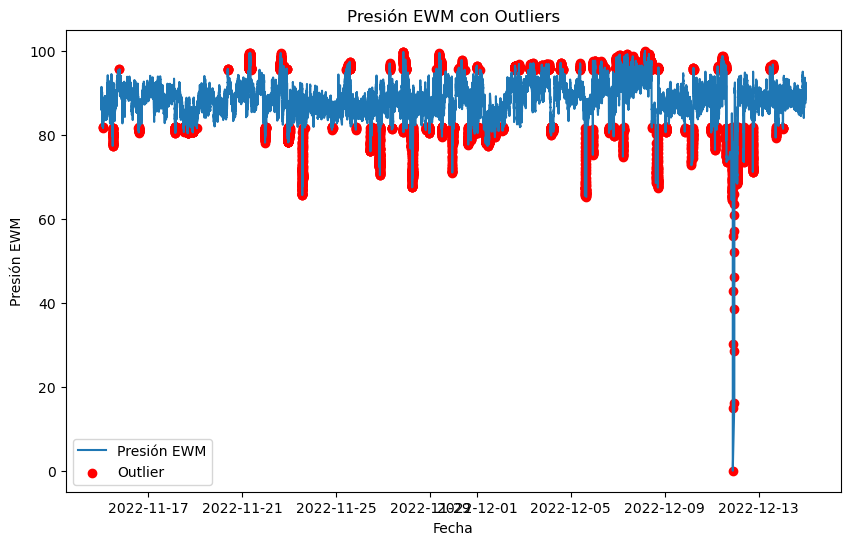

Outliers detectados:
                     velocidad      potencia  per_solidos  celda_carga  \
date                                                                     
2022-11-15 01:56:50  66.722221  33715.590013     75.20117    57.030586   
2022-11-15 01:57:00  66.722221  33791.876820     75.20117    57.030586   
2022-11-15 01:57:20  66.338823  33079.866622     75.20117    57.030586   
2022-11-15 11:45:50  70.552446  34230.525959     72.19336    52.138207   
2022-11-15 11:46:10  68.714014  33308.727043     70.58984    52.138207   
...                        ...           ...          ...          ...   
2022-12-14 00:52:00  52.013820  25962.943266     77.71875    47.861793   
2022-12-14 00:52:10  51.247959  25962.943266     77.71875    47.886870   
2022-12-14 00:52:20  51.247959  25962.943266     78.60742    48.047111   
2022-12-14 00:52:30  51.247959  25962.943266     78.60742    48.162243   
2022-12-14 00:52:40  51.247959  25962.943266     78.60742    48.377606   

                

In [31]:
# Detectar Outlayer usando pyOD... 

# Extraer los precios
presion = df['presion_ewm'].values.reshape(-1, 1)

# Inicializar el modelo de Isolation Forest
model = IForest(contamination=0.05)
model.fit(presion)

# Predecir outliers
df['Outlier'] = model.predict(presion)

# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['presion_ewm'], label='Presión EWM')
plt.scatter(df.index[df['Outlier'] == 1], df['presion_ewm'][df['Outlier'] == 1], 
            color='red', label='Outlier', marker='o')
plt.xlabel('Fecha')
plt.ylabel('Presión EWM')
plt.title('Presión EWM con Outliers')
plt.legend()
plt.show()

# Imprimir los outliers detectados
outliers = df[df['Outlier'] == 1]
print("Outliers detectados:")
print(outliers)

Valorar si revisar Outliers solo de la variable objetivo o de las demás también...

# Visualizar todo el set de datos...

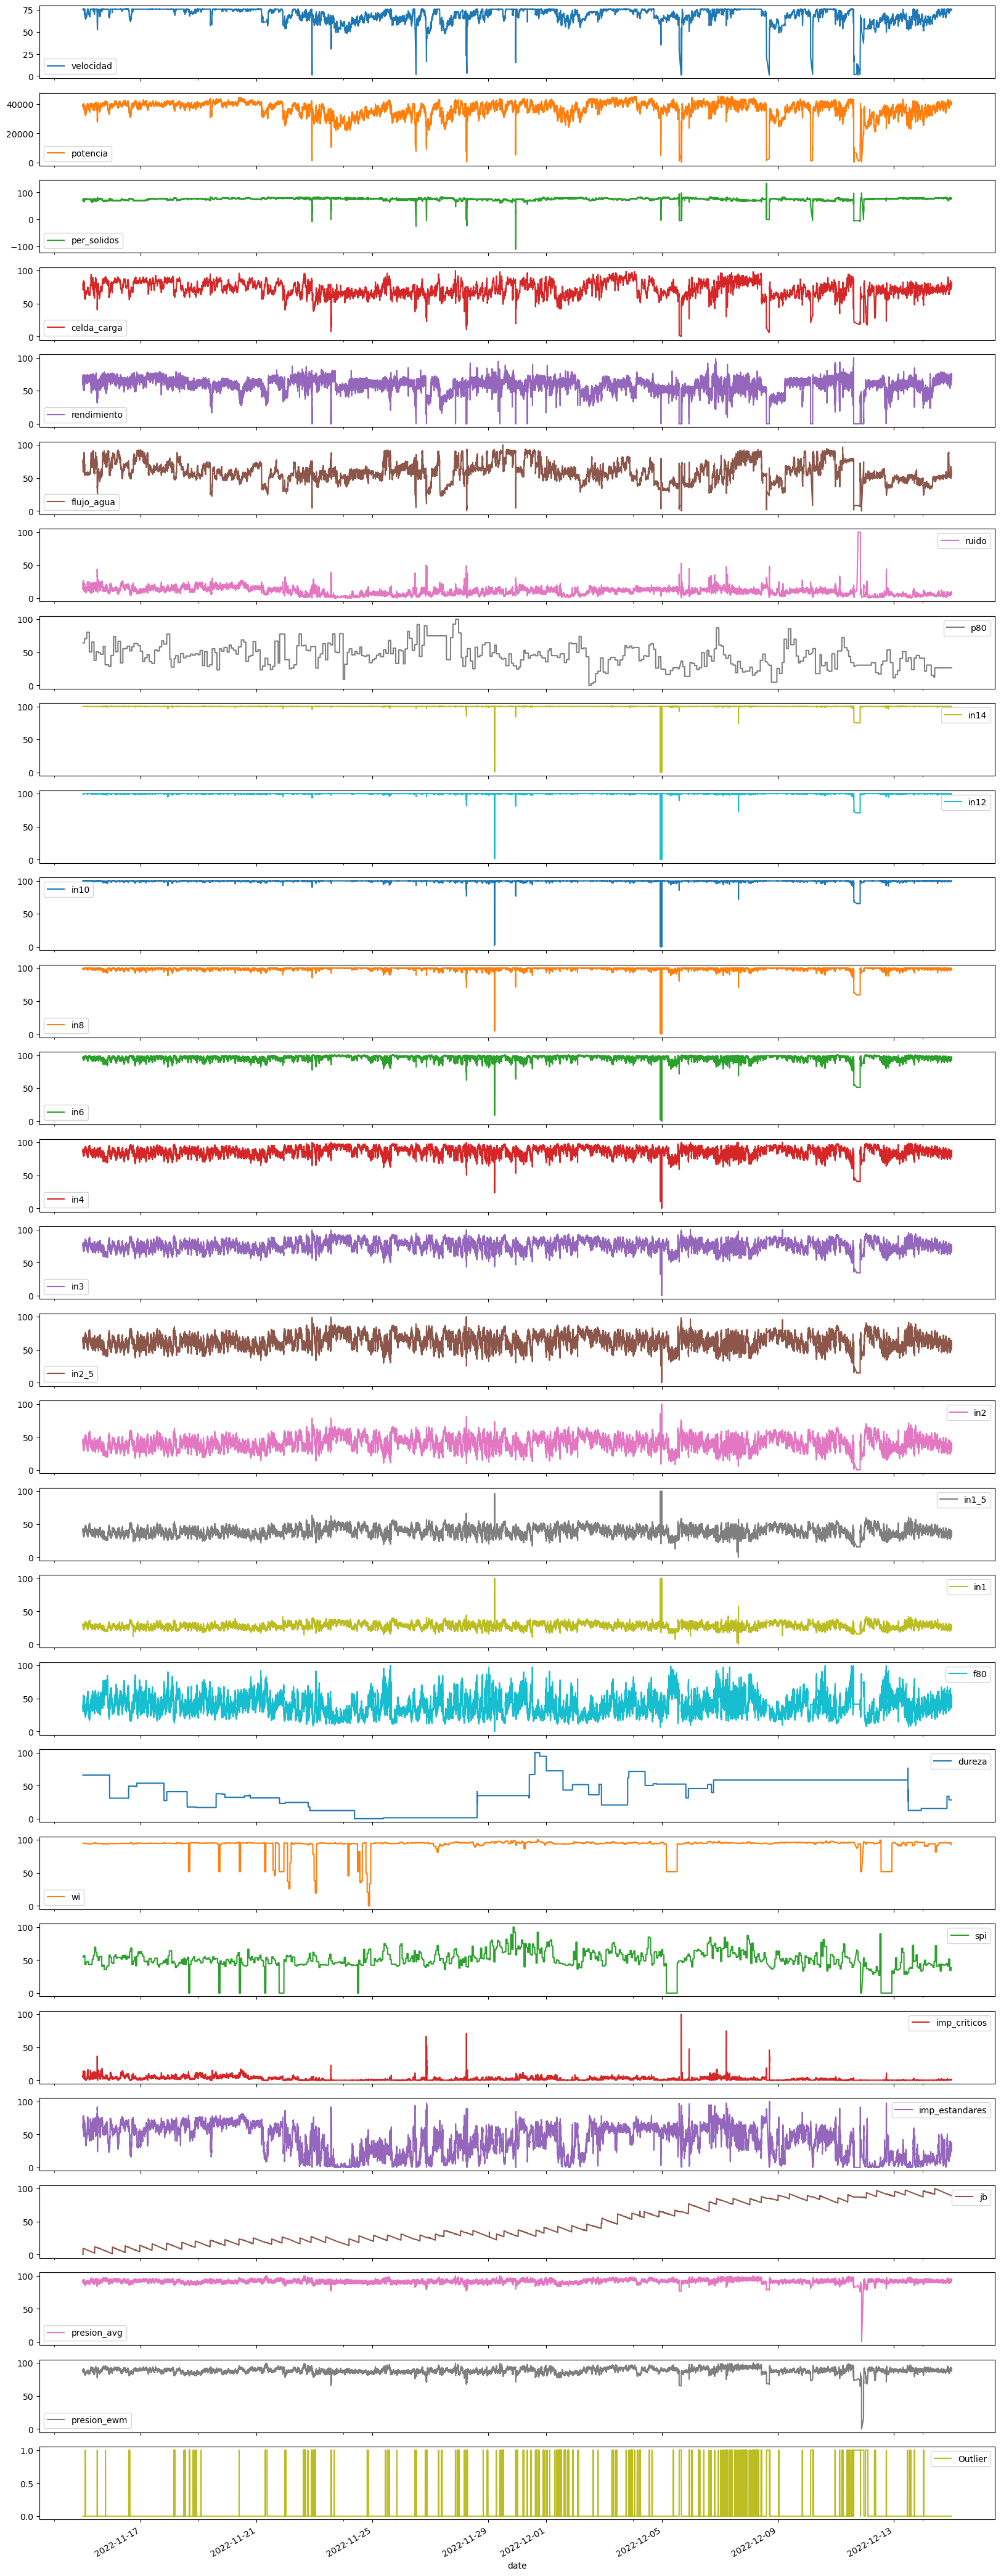

In [32]:
# Para visualizar todo el set de datos...

# Columnas del dataset...
cols = df.columns

# Dibujar la totalidad de registros...
N = df.shape[0]       # Número de registros...
plots = df[cols][0:N] # Series de tiempo individuales...
plots.index = df.index[0:N] # Variable tiempo...
_ = plots.plot(subplots=True, figsize=(20,60))

# Revisando la periodicidad de los datos...

In [33]:
# Análisis de la periodicidad del dataset...
df_time_diffs = df.index.to_series().diff().dt.total_seconds()
print(df_time_diffs.value_counts())

date
10.0      190099
20.0       31310
30.0         300
40.0          17
90.0           5
80.0           4
50.0           3
100.0          3
110.0          3
70.0           2
120.0          2
60.0           2
940.0          1
310.0          1
5780.0         1
5990.0         1
3600.0         1
8350.0         1
230.0          1
280.0          1
5870.0         1
650.0          1
7950.0         1
600.0          1
990.0          1
1170.0         1
5590.0         1
420.0          1
2430.0         1
1010.0         1
570.0          1
350.0          1
Name: count, dtype: int64


# Importancia de las características v2

In [34]:
# Preparando los datos...
X = df.drop("presion_ewm", axis = 1)
y = df["presion_ewm"]

In [35]:
# Escalando las características del conjunto de datos X...
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Regresión lineal... Método Lasso...

In [36]:
# Determinando el mejor alpha para este modelo...
alphas = [0.001, 0.01, 0.1, 1, 10, 20, 100, 1000]
scores = []

for alpha in alphas:
    lasso = Lasso(alpha = alpha)
    lasso.fit(X_scaled, y)
    score = lasso.score(X_scaled, y)
    scores.append(score)

print(scores, np.argmax(scores))

[0.9578804753646526, 0.9575340134616895, 0.9530448422343231, 0.8693289230349496, 0.0, 0.0, 0.0, 0.0] 0


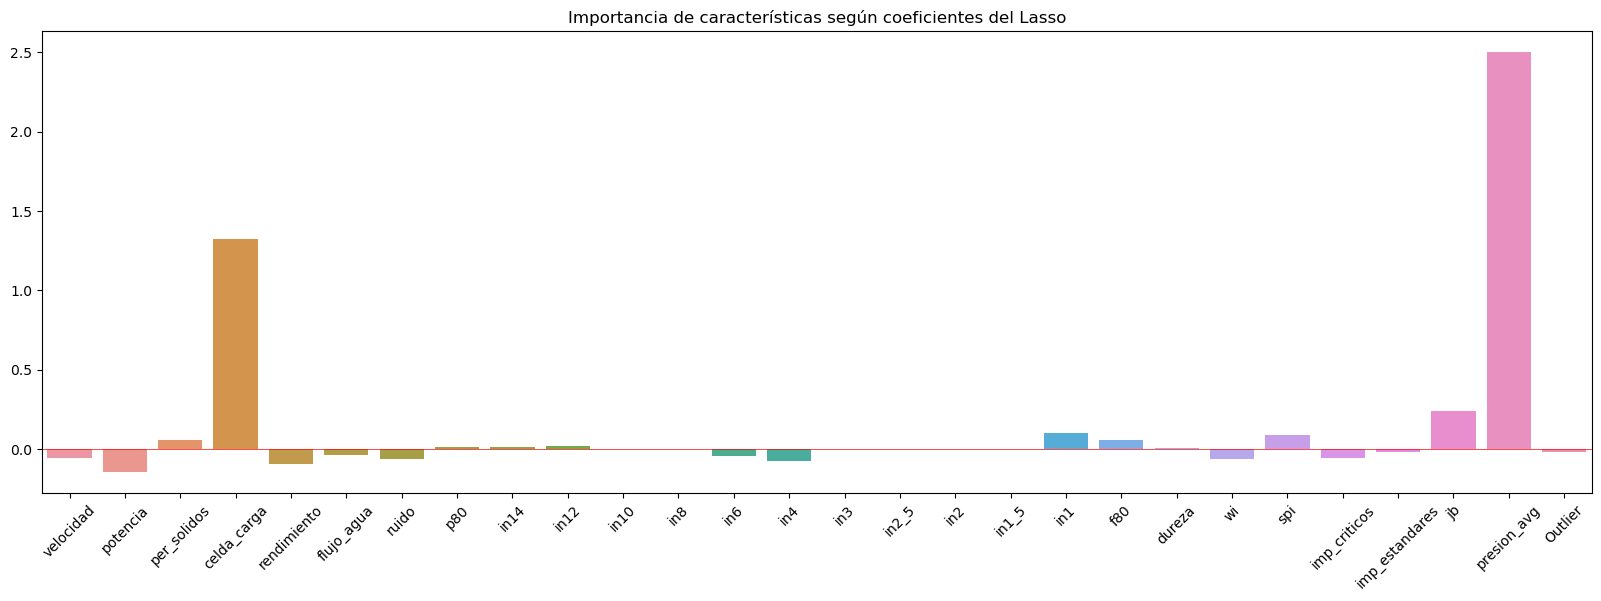

In [37]:
# Realizando la prueba...
lasso = Lasso(alpha = 0.001)
coef = lasso.fit(X_scaled, y).coef_

# Graficando...
plt.figure(figsize=(20, 6))
ax = sns.barplot(x = X.columns, y = coef)
plt.axhline(0, color = "red", linewidth = 0.5)
plt.xticks(rotation = 45)
plt.title("Importancia de características según coeficientes del Lasso")
plt.show()

In [38]:
# Viendo que tal con una regresión lineal...

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = lasso.predict(X_test)

# Calcular R^2
r2 = r2_score(y_test, y_pred)

# Calcular MSE
mse = mean_squared_error(y_test, y_pred)

print("R^2:", r2)
print("MSE:", mse)

R^2: 0.9574393501568477
MSE: 0.5895327140529247


C:\Users\mcd\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.706e+02, tolerance: 2.408e+02
  model = cd_fast.enet_coordinate_descent(


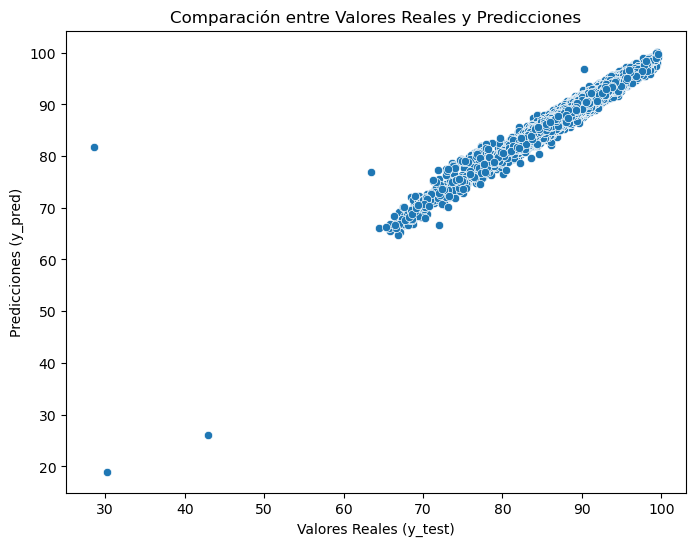

In [39]:
# Graficando...
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Valores Reales (y_test)')
plt.ylabel('Predicciones (y_pred)')
plt.title('Comparación entre Valores Reales y Predicciones')
plt.show()